# **Setup**

In [94]:
import rspredict.data.datarequester as rspred

In [95]:
# Set up data request
rsd = rspred.RSDataRequester()
rsd.set_game_base("rs")
rsd.set_data_filter("all")
rsd.show_debug = True
rsd.integrate_social = False

In [96]:
import requests # use to retrieve data from API
import math
import pandas as pd
import datetime as datetime
import tensorflow as tf
from tensorflow.keras.utils import timeseries_dataset_from_array
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import IPython

# **Get data**

In [173]:
#ge_ts_prices = rsd.get_time_series_historical_prices(indiv_item_ids = [48926, 48211])
ge_ts_prices = rsd.get_historical_prices(indiv_item_ids= [251,257,3000,12172,253,2998,269,14854,12109,5976,5935,6693,
                                                          6016,107,11326,261,265,267,21624,249,255,259,263,2481,9735,
                                                          241,109,221,21628,3051,12174,203,3049,219,14836,91,7654,7658,
                                                          7656,7652,9736,211,215,217,21626,199,205,209,213,2485,201,207])
display(ge_ts_prices)

Status of item 6016: 200
Status of item 257: 200
Status of item 259: 200
Status of item 261: 200
Status of item 14854: 200
Status of item 263: 200
Status of item 9735: 200
Status of item 265: 200
Status of item 9736: 200
Status of item 267: 200
Status of item 12172: 200
Status of item 269: 200
Status of item 12174: 200
Status of item 6693: 200
Status of item 5935: 200
Status of item 2481: 200
Status of item 2485: 200
Status of item 2998: 200
Status of item 3000: 200
Status of item 11326: 200
Status of item 199: 200
Status of item 201: 200
Status of item 203: 200
Status of item 12109: 200
Status of item 205: 200
Status of item 207: 200
Status of item 209: 200
Status of item 211: 200
Status of item 213: 200
Status of item 215: 200
Status of item 5976: 200
Status of item 217: 200
Status of item 219: 200
Status of item 91: 200
Status of item 221: 200
Status of item 7652: 200
Status of item 7654: 200
Status of item 7656: 200
Status of item 3049: 200
Status of item 7658: 200
Status of item 1

,index,id,price,volume,timestamp,date,date_string,weekday,diff_1_day,diff_7_day,diff_14_day,diff_30_day,ma_7_day,ma_14_day,ma_30_day,diff_ma_7_day,diff_ma_14_day,diff_ma_30_day
0,30,6016,2472,NaN,1213920000000,2008-06-20 00:00:00+00:00,2008-06-20,1,29.0,45.0,-111.0,206.0,1336.571429,1353.285714,1362.933333,-5.571429,-2.785714,-1.400000
1,31,6016,2472,NaN,1214006400000,2008-06-21 00:00:00+00:00,2008-06-21,0,0.0,98.0,-46.0,222.0,1331.000000,1350.500000,1361.533333,-5.571429,-2.785714,-1.400000
2,33,6016,2561,NaN,1214179200000,2008-06-23 00:00:00+00:00,2008-06-23,1,87.0,168.0,92.0,331.0,1321.857143,1340.357143,1356.600000,-9.142857,-7.357143,-3.533333
3,34,6016,2561,NaN,1214265600000,2008-06-24 00:00:00+00:00,2008-06-24,1,0.0,158.0,92.0,331.0,1312.714286,1333.000000,1353.066667,-9.142857,-7.357143,-3.533333
4,35,6016,2532,NaN,1214352000000,2008-06-25 00:00:00+00:00,2008-06-25,1,-29.0,120.0,85.0,215.0,1303.571429,1325.642857,1349.600000,-9.142857,-7.357143,-3.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265703,306388,255,3211,115022.0,1729064197000,2024-10-16 07:36:37+00:00,2024-10-16,1,0.0,94.0,-306.0,-505.0,988.000000,1001.500000,986.866667,1.000000,-1.428571,1.700000
265704,306389,255,3211,72413.0,1729133039000,2024-10-17 02:43:59+00:00,2024-10-17,1,0.0,148.0,-161.0,-518.0,989.000000,1000.071429,988.566667,1.000000,-1.428571,1.700000
265705,306390,255,3115,65017.0,1729230560000,2024-10-18 05:49:20+00:00,2024-10-18,1,-96.0,52.0,-257.0,-614.0,990.000000,998.642857,989.900000,1.000000,-1.428571,1.333333
265706,306391,255,3115,95837.0,1729369679000,2024-10-19 20:27:59+00:00,2024-10-19,0,0.0,52.0,-128.0,-639.0,991.571429,996.642857,991.366667,1.571429,-2.000000,1.466667


# **Prepare dataset**

This modeling work is based on work done by Kavya Malla to implement multiple time series.
* [Tensorflow tf.data Pipeline for Multiple Time Series](https://medium.com/@kavyamalla/extending-tensorflows-window-generator-for-multiple-time-series-8b15eba57858)
* [medium_posts/WindowGenerator_with_Multiple_Time_Series.ipynb](https://github.com/kavya006/medium_posts/blob/main/WindowGenerator_with_Multiple_Time_Series.ipynb)

In [276]:
# Model settings for time series.
LABELS = ["diff_1_day"] # targets to predict
FEATURES = ["price", "ma_7_day"] # variables used to predict
TIMECOMP = "date" # column for time component
IN_STEPS = 3 # timepoints used to predict
OUT_STEPS = 3  # timepoints to predict out
GROUPBY = ['id'] # column used to specify time series by
BATCH_SIZE = 8 

TRAIN_VAL_TEST_RATIO = (0.7, 0.2, 0.1)
total_ratio = sum([x for x in TRAIN_VAL_TEST_RATIO])
final_train_val_test_ratio = tuple([x / total_ratio for x in TRAIN_VAL_TEST_RATIO])
print(final_train_val_test_ratio)

(0.7, 0.2, 0.1)


In [277]:
final_columns = LABELS + FEATURES + GROUPBY + [TIMECOMP]
print(final_columns)

['diff_1_day', 'price', 'ma_7_day', 'id', 'date']


In [278]:
ge_final_ts_prices = ge_ts_prices[final_columns]
display(ge_final_ts_prices)

,diff_1_day,price,ma_7_day,id,date
0,29.0,2472,1336.571429,6016,2008-06-20 00:00:00+00:00
1,0.0,2472,1331.000000,6016,2008-06-21 00:00:00+00:00
2,87.0,2561,1321.857143,6016,2008-06-23 00:00:00+00:00
3,0.0,2561,1312.714286,6016,2008-06-24 00:00:00+00:00
4,-29.0,2532,1303.571429,6016,2008-06-25 00:00:00+00:00
...,...,...,...,...,...
265703,0.0,3211,988.000000,255,2024-10-16 07:36:37+00:00
265704,0.0,3211,989.000000,255,2024-10-17 02:43:59+00:00
265705,-96.0,3115,990.000000,255,2024-10-18 05:49:20+00:00
265706,0.0,3115,991.571429,255,2024-10-19 20:27:59+00:00


In [279]:
# Create train, validation, and test datasets

# Get dataset count and proportions for spliting dataset into training, validation, and test datasets
n = len(ge_ts_prices) 
train_val_r = final_train_val_test_ratio[0]
val_test_r = final_train_val_test_ratio[0] + final_train_val_test_ratio[1]

def get_iloc(n, ratio):
    return int(len(n) * ratio)

# Split using groupby (to split each item specific data) and iloc (split item specific records into train, val, test)
train_series = ge_final_ts_prices.groupby(GROUPBY, as_index=False).apply(lambda x: x.iloc[:get_iloc(x, train_val_r)]).reset_index(drop=True)
val_series = ge_final_ts_prices.groupby(GROUPBY, as_index=False).apply(lambda x: x.iloc[get_iloc(x, train_val_r):get_iloc(x, val_test_r)]).reset_index(drop=True)
test_series = ge_final_ts_prices.groupby(GROUPBY, as_index=False).apply(lambda x: x.iloc[get_iloc(x, val_test_r):]).reset_index(drop=True)

print(f"""Shape summary:
      Train shape: {train_series.shape}
      Val shape: {val_series.shape}
      Test shape: {test_series.shape}""")

record_count = train_series.shape[0]+ val_series.shape[0]+ test_series.shape[0]
if len(ge_ts_prices) == record_count:
    print("All records accounted for.")
else:
    print(f"{abs(len(ge_ts_prices) - record_count)} difference between split and original dataset.")

Shape summary:
      Train shape: (185971, 5)
      Val shape: (53138, 5)
      Test shape: (26599, 5)
All records accounted for.


C:\Users\yangs\AppData\Local\Temp\ipykernel_38268\2752667114.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_series = ge_final_ts_prices.groupby(GROUPBY, as_index=False).apply(lambda x: x.iloc[:get_iloc(x, train_val_r)]).reset_index(drop=True)
C:\Users\yangs\AppData\Local\Temp\ipykernel_38268\2752667114.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_series = ge_final_ts_prices.groupby(G

# **Prepare Modeling**

In [280]:
class MultiSeriesWindowsGenerator():
  def __init__(self, input_width, label_width, steps, batch_size, time_col, labels=[], features=[], static_columns=[], GROUPBY=None):

    self.batch_size = batch_size

    # Work out the label column indices.
    self.label_columns = labels
    if len(labels) != 0:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(labels)}
    
    self.GROUPBY = GROUPBY 
    self.time_col = time_col
    self.regressor_columns = features
    self.static_columns = static_columns

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = steps

    self.total_window_size = input_width + steps

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Batch Size: {self.batch_size}',
        f'Label column name(s): {self.label_columns}',
        f'Additional Regressor column name(s): {self.regressor_columns}', 
        f'GROUPBY column(s): {self.GROUPBY}' 
        ])
  
  

In [281]:
def preprocess_dataset(self:MultiSeriesWindowsGenerator, data:pd.DataFrame):
    try:
      if np.vstack(data.index).shape[1] != 1:
        data = data.reset_index() 

      by = self.GROUPBY + [self.time_col]
      labels = self.label_columns + self.regressor_columns + self.static_columns
      data = data.set_index(by).unstack(-1)
      data = tf.stack([data[label] for label in labels], axis=-1)
      
      if data.ndim != 3:
          data = data[None, None, tf.newaxis]
    except Exception as e:
      print('Error while processing dataset', e)
    return data 

def get_training_mean_std(self:MultiSeriesWindowsGenerator, data:pd.DataFrame):
    self.GROUPBY + [self.time_col]
    return data 

def update_datasets(self:MultiSeriesWindowsGenerator, train_df:pd.DataFrame, val_df:pd.DataFrame, test_df:pd.DataFrame, norm:bool=False):
    # Store the raw data.
    self.train_df = self.preprocess_dataset(train_df)
    self.val_df = self.preprocess_dataset(val_df)
    self.test_df = self.preprocess_dataset(test_df)

    if norm: # If we want to normalize the data:
      # Get mean and std for normalization
      # train_mean = tf.reduce_mean(self.train_df, axis=1, keepdims=True)
      # train_std = tf.math.reduce_std(self.train_df, axis=1, keepdims=True)
      train_mean = tf.convert_to_tensor(np.nanmean(self.train_df.numpy(), axis = 1, keepdims = True))
      train_std = tf.convert_to_tensor(np.nanstd(self.train_df.numpy(), axis = 1, keepdims = True))

      # Create final training/validation/test tensors
      self.train_df = (self.train_df - train_mean) / train_std
      self.val_df = (self.val_df - train_mean) / train_std
      self.test_df = (self.test_df - train_mean) / train_std

      # Retain normalization info for potential denormalization.
      self.train_mean = train_mean 
      self.train_std = train_std 
      self.norm = norm 

    labels = self.label_columns + self.regressor_columns + self.static_columns
    self.column_indices = {name: i for i, name in enumerate(labels)}

MultiSeriesWindowsGenerator.preprocess_dataset = preprocess_dataset 
MultiSeriesWindowsGenerator.update_datasets = update_datasets

In [282]:
w1 = MultiSeriesWindowsGenerator(input_width=IN_STEPS, label_width=OUT_STEPS, steps=OUT_STEPS, 
                                 batch_size=BATCH_SIZE, time_col = TIMECOMP, 
                                 labels=LABELS, GROUPBY=GROUPBY, features=FEATURES)
w1.update_datasets(train_series, val_series, test_series, norm=True)

In [283]:
def split_window(self, features:tf.Tensor):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    
    # additional check for when the label columns = regressor columns
    if self.label_columns is not None : 
        labels = tf.stack(
          [labels[:, :, self.column_indices[name]] 
          for name in self.label_columns], axis=-1)
          
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels 
MultiSeriesWindowsGenerator.split_window = split_window

In [284]:
example_window = tf.stack([
    np.array(train_series.set_index(GROUPBY + [TIMECOMP])[:w1.total_window_size]), 
    np.array(train_series.set_index(GROUPBY + [TIMECOMP])[2:2+w1.total_window_size]),
    np.array(train_series.set_index(GROUPBY + [TIMECOMP])[4:4+w1.total_window_size])
])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 6, 3)
Inputs shape: (3, 3, 3)
Labels shape: (3, 3, 1)


In [285]:
w1.example = (example_inputs, example_labels)

def plot(self, model=None, plot_col=LABELS[0], max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  
  for n in range(max_n):
    
    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    # if len(set(self.label_columns + self.regressor_columns)) == 1:
    #   label_col_index = 0
    #   plot_col_index = 0
    if label_col_index is None:
      continue
    
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} {"[normed]" if self.norm else ""}')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)   

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [MS]')

MultiSeriesWindowsGenerator.plot = plot

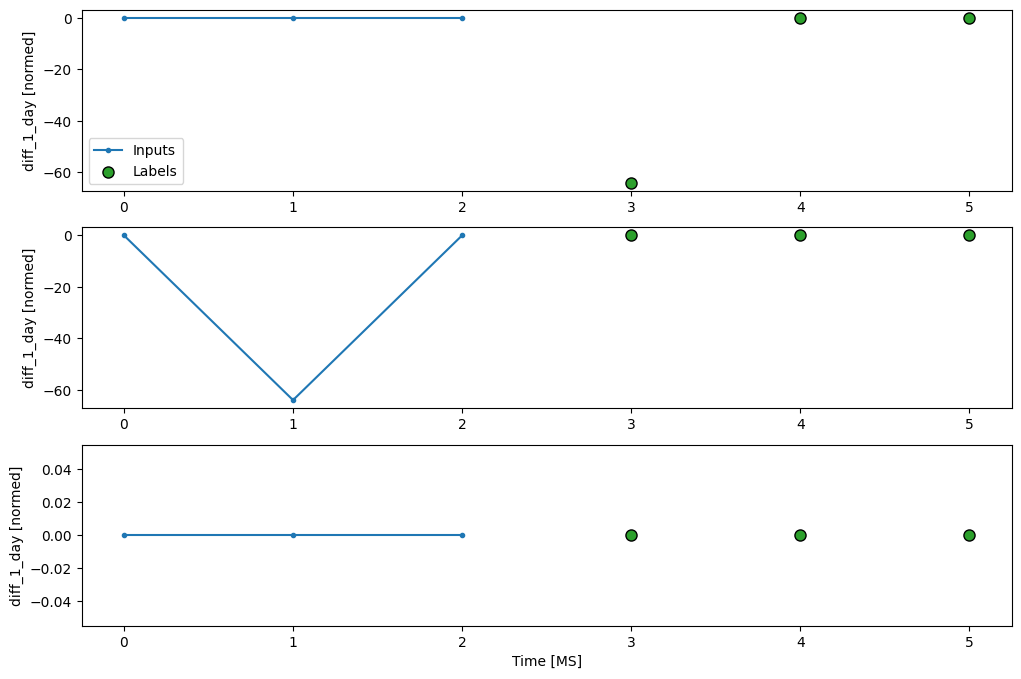

In [286]:
w1.plot()

In [287]:
def make_cohort(self, data:np.array) -> tf.data.Dataset:
    data = np.array(data, dtype=np.float32) 
    ds = timeseries_dataset_from_array(
        data=data, 
        targets=None, 
        sequence_length=self.total_window_size, 
        sequence_stride=1, 
        shuffle=True, 
        batch_size=self.batch_size
    )
    ds = ds.map(self.split_window) 
    return ds 

MultiSeriesWindowsGenerator.make_cohort = make_cohort

In [288]:
w1.make_cohort(train_series.set_index(GROUPBY + [TIMECOMP]))

<_MapDataset element_spec=(TensorSpec(shape=(None, 3, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3, 1), dtype=tf.float32, name=None))>

In [289]:
"""
From Kavya: Reference code from https://stackoverflow.com/questions/49994496/mixing-multiple-tf-data-dataset
"""

def stack_windows(*windows):
    features = tf.concat([window[0] for window in windows], 0) 
    labels = tf.concat([window[1] for window in windows], 0) 
    return (features, labels)
    
def make_dataset(self, data:tf.Tensor) -> tf.data.Dataset:    
    # num_cohorts = min(10, len(cluster_cohorts))
    # print(cluster, num_cohorts)
    ds_list = tuple(self.make_cohort(data[i]) for i in range(len(data)))
    ds = tf.data.Dataset.zip(ds_list)
    ds = ds.map(stack_windows)
    ds = ds.unbatch() 
    ds = ds.shuffle(10, seed=0)
    ds = ds.batch(self.batch_size) 
    ds = ds.prefetch(1)
    return ds 

MultiSeriesWindowsGenerator.make_dataset = make_dataset


In [290]:
@property
def train(self) -> tf.data.Dataset:
    return self.make_dataset(self.train_df)

@property 
def val(self) -> tf.data.Dataset:
    return self.make_dataset(self.val_df)

@property 
def test(self) -> tf.data.Dataset:
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting"""
    result = getattr(self, '_example', None) 
    print('Number of train batches:', len(list(self.train.as_numpy_iterator())))
    if result is None: 
        result = next(iter(self.train)) 
        self._example = result 
    return result 

MultiSeriesWindowsGenerator.train = train 
MultiSeriesWindowsGenerator.test = test 
MultiSeriesWindowsGenerator.val = val 
MultiSeriesWindowsGenerator.example = example 

In [291]:
for example_inputs, example_labels in w1.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (8, 3, 3)
Labels shape (batch, time, features): (8, 3, 1)


Number of train batches: 35295


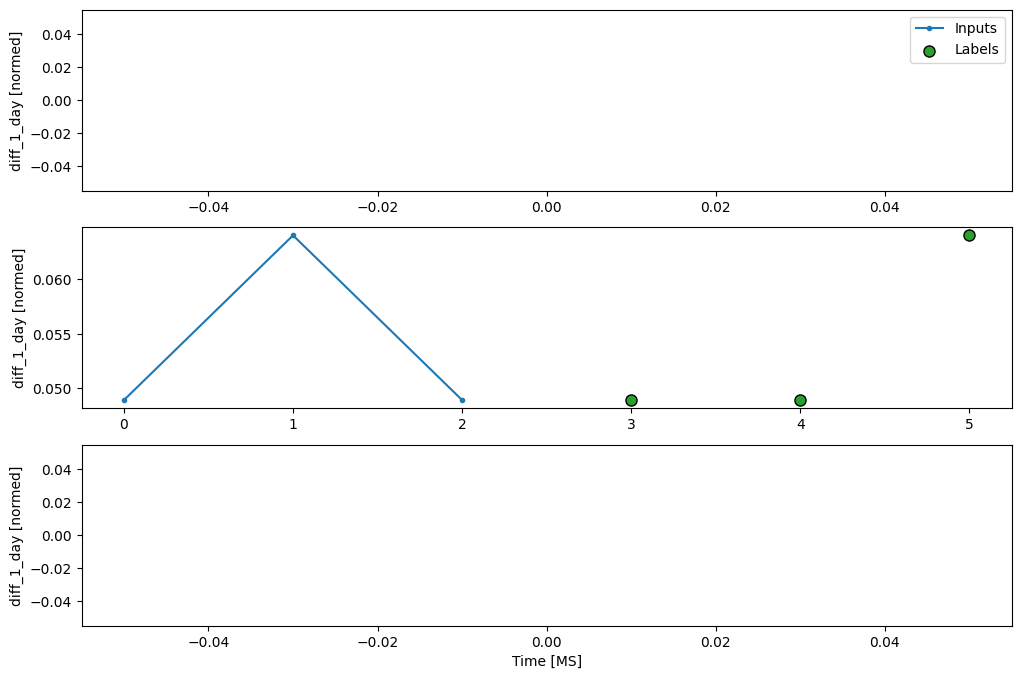

In [293]:
w1.plot()

# **Model Baseline**

In [221]:
single_step_window = MultiSeriesWindowsGenerator(
    input_width=1, label_width=1, steps=1, batch_size=BATCH_SIZE, GROUPBY=GROUPBY, labels=LABELS, features=FEATURES, time_col= TIMECOMP)
single_step_window.update_datasets(train_series, val_series, test_series, norm=True)

In [222]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]
     

In [223]:
single_step_window.train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 1, 6), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [224]:
baseline = Baseline(label_index=single_step_window.column_indices[LABELS[0]])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

19857/19857 ━━━━━━━━━━━━━━━━━━━━ 17s 737us/step - loss: nan - mean_absolute_error: nan


C:\Users\yangs\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


In [225]:
wide_window = MultiSeriesWindowsGenerator(
    input_width=IN_STEPS, label_width=OUT_STEPS, steps=1, batch_size=BATCH_SIZE, GROUPBY = GROUPBY,
    labels=LABELS, features=FEATURES, time_col= TIMECOMP)
wide_window.update_datasets(train_series, val_series, test_series, norm=True)
wide_window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Batch Size: 8
Label column name(s): ['diff_1_day']
Additional Regressor column name(s): ['price', 'diff_7_day', 'diff_14_day', 'ma_7_day', 'ma_14_day']
GROUPBY column(s): ['id']

Number of train batches: 35237


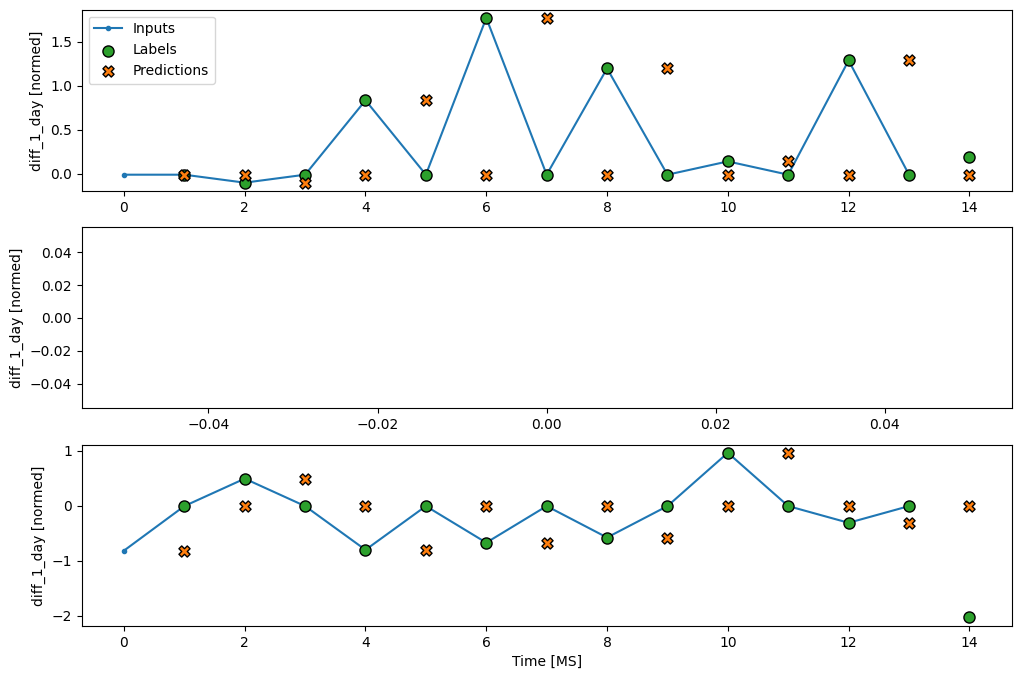

In [226]:
wide_window.plot(baseline)

# **Model RNN**

19832/19832 ━━━━━━━━━━━━━━━━━━━━ 22s 988us/step - loss: nan - mean_absolute_error: nan


C:\Users\yangs\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Number of train batches: 35295


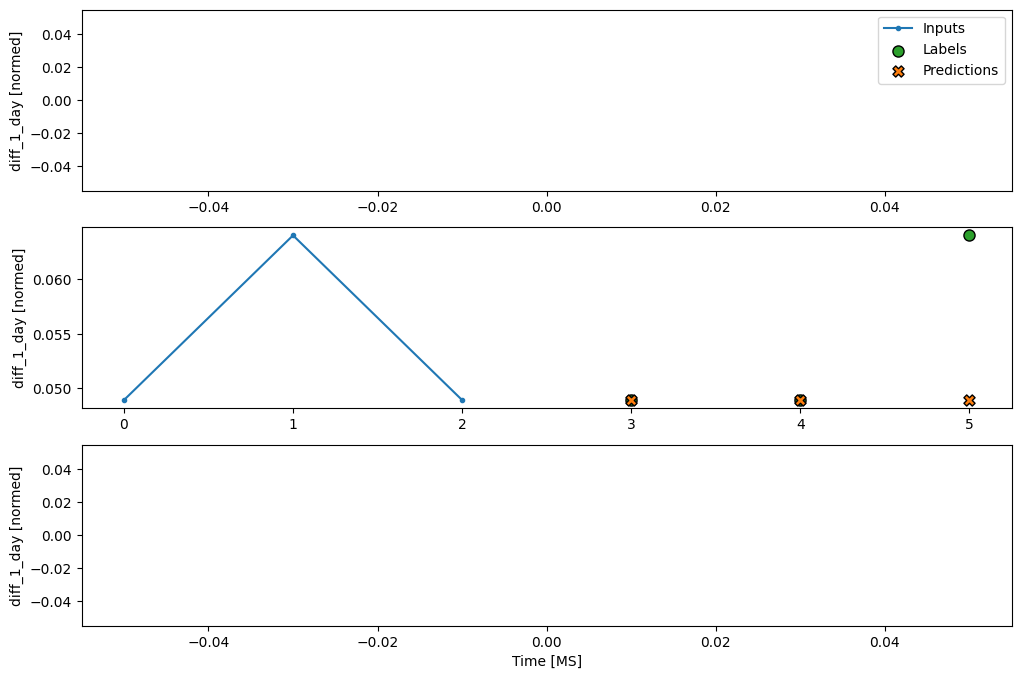

In [294]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(w1.val, return_dict=True)
multi_performance['Last'] = last_baseline.evaluate(w1.test, verbose=0, return_dict=True)
w1.plot(last_baseline)

In [298]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  # adjust parameters to cause this to converge... or get more data
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

19832/19832 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: nan - mean_absolute_error: nan
Number of train batches: 35295


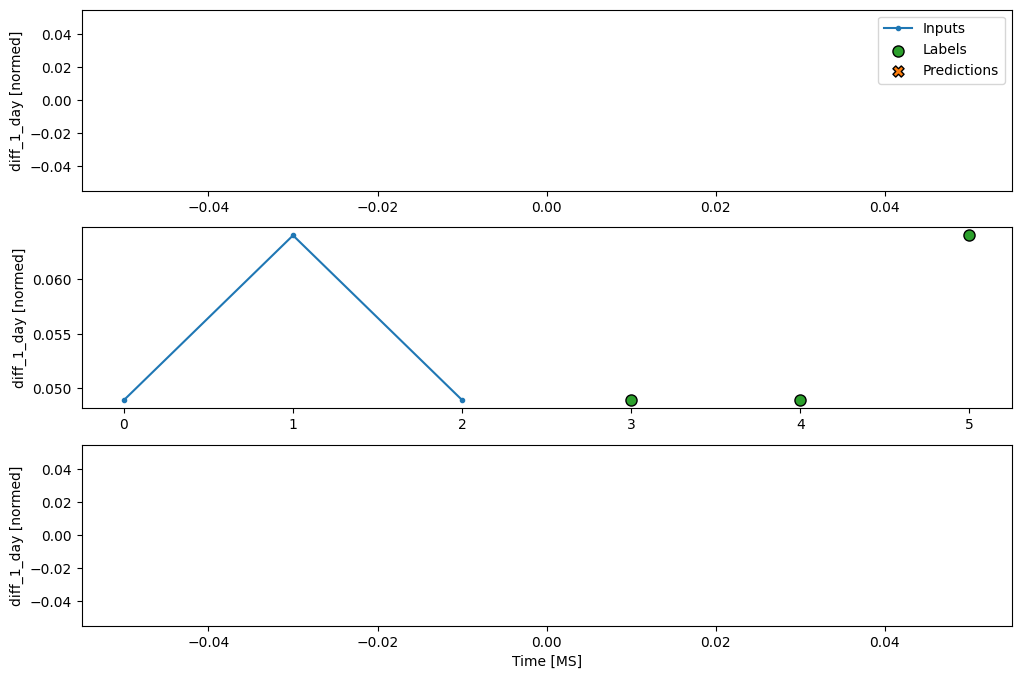

In [299]:
num_features = len(FEATURES)
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(IN_STEPS*num_features, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, w1)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(w1.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(w1.test, verbose=0, return_dict=True)
w1.plot(multi_lstm_model)